# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "iframe"
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
# !pip install cufflinks
# !pip install plotly

## Exploratory Data Analysis and Visualization

In [3]:
df = pd.read_excel("Raisin_Dataset.xlsx") # Reading the dataset

In [4]:
df.head() 

# Türkiye de yetiştirilen Keçimen ve Besni kuru üzümlerinin 7 tane özelliği verilmiş
# Bu üzümleri yapısal özelliklerine göre sınıflandıracağız

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
df.info() # Missing value yok. Dtype lar nümerik. Data cleaning yapmayacağız

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df.shape

(900, 8)

In [7]:
df.duplicated().sum()   # No duplicates

0

In [8]:
df.isnull().sum().any() # No missing values

False

In [9]:
df.describe()    # Std > mean olduğu durum yok gibi görünüyor şu an için

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


[Text(0, 0, '450'), Text(0, 0, '450')]

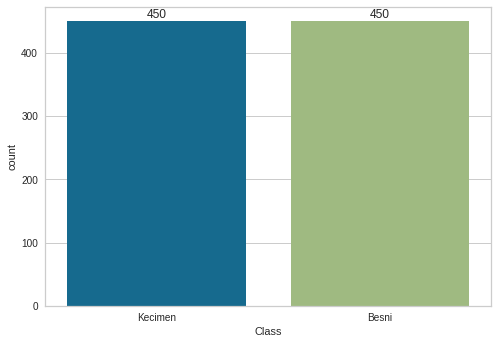

In [10]:
ax= sns.countplot(df["Class"]);
ax.bar_label(ax.containers[0]) # to show the proportion of each class
# Balanced bir data seti var elimizde.(Yani değerlendirmek için accuracy yi kullanabiliriz)

We have prety same amout of classes in the data set. So I can use accuracy as a metric to evaluate the performance of the classifier.

In [11]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) # mapping the classes to 0 and 1
# Keçimen ve Besniyi sayısal değerlere çevirelim. Map ledik

In [12]:
df.iloc[:,:-1].iplot(kind="box") # Tek alanda tüm boxplotları gördük plotly ile

In [13]:
# Sınıf bazında bakalım
fig = px.box(df, color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()

In [14]:
df.iplot(kind="bar")
# Data ilk 450 satır Keçimen e ait, sonraki 450 si Besni olarak sınıflandırılmış
# Barplot a baktığımız zaman 450 den sonrasında areası büyükse besni(1) sınıfına ait diyebiliriz
# MajoraxisLength için aynı yorumu yapabiliriz
# MinorAxisLength için tam olarak ayırt edici diyemeyebiliriz
# Eccentricity için de tam olarak ayırt edici diyemeyiz
# ..
# Extent için de tam olarak ayırt edici diyemeyiz
# Perimeter için büyük olursa besni sınıfına ait olduğunu söyleyebiliriz

In [15]:
fig = px.bar(df,x=df.index,y="Area",color="Class",color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()
# Area yı inceledik class ile durumunu

<AxesSubplot:>

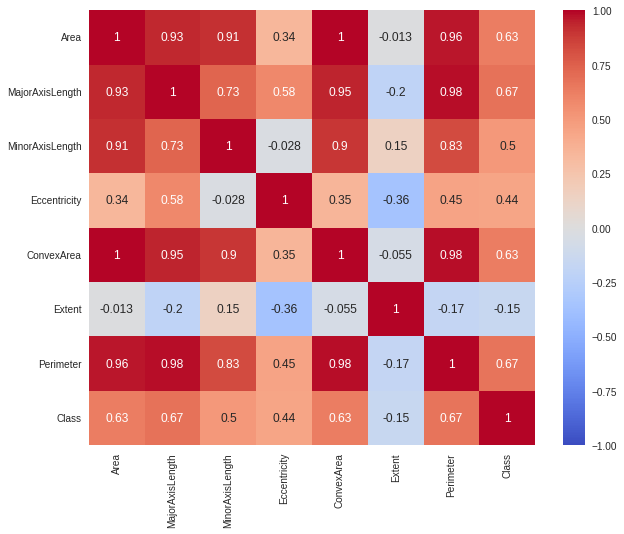

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1, annot=True, cmap='coolwarm')
# Ciddi korelasyonlar görünüyor
# Örneğin: Area ile Perimeter , Perimeter ile MajorAxislength
# Multicollinearity olduğunu görüyoruz burada
# Multicollinearity da baskın olan feature diğer feature ı ezmiş oluyor. Baskılıyor bir nevi
# Bu sorunu bizim modelimiz çözecek

In [17]:
corr_matrix = df.corr()
fig = px.imshow(corr_matrix)  # px: plotly.express kütüphanesinden
fig.show()
# Bu çıktıdan da çeşitli insightlar elde edebiliriz
# Yukardaki heatmap e alternatif olarak kullanabiliriz

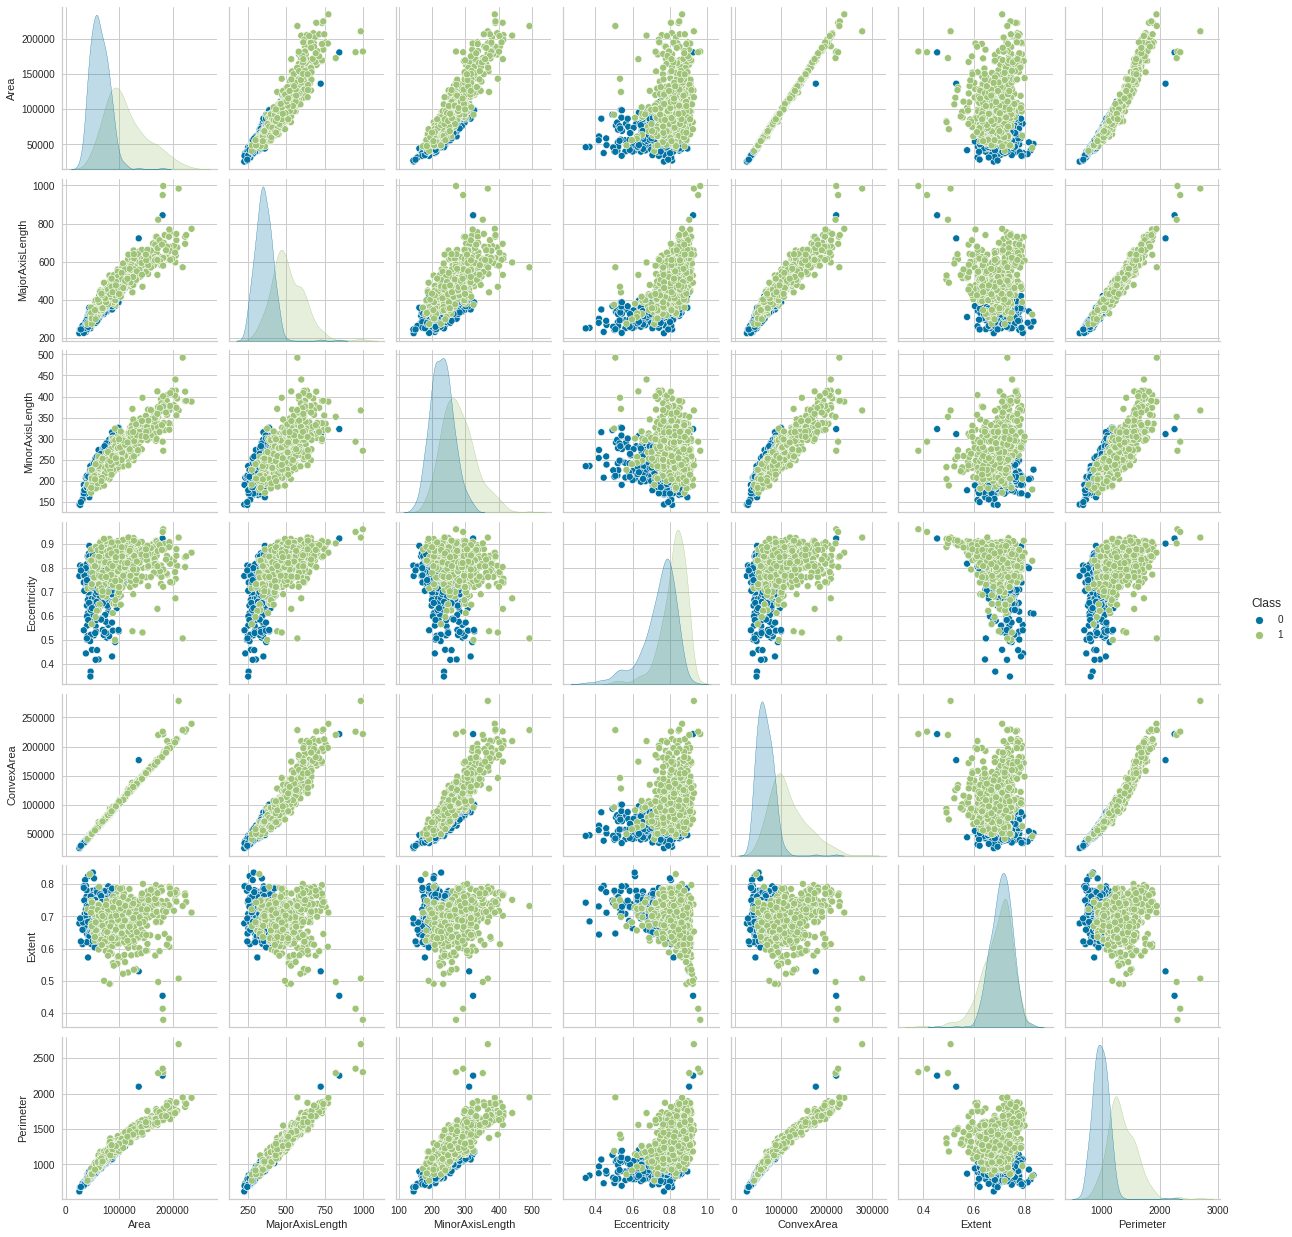

In [18]:
sns.pairplot(df, hue = "Class")
# Sınıfların genelde iç içe girdiğini görüyoruz
# Yani datamın birbirinden düzgün bir şekilde ayrılmadığını görüyoruz
# İdeal istediğimiz durum --> çıktının altındaki resimdi

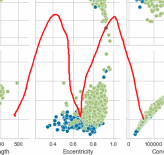

In [19]:
fig = px.scatter_3d(df, x='Perimeter', y='Area', z='Extent',
              color='Class')
fig.show()
# Grafiği tutup çevirebiliriz
# İç içe giren noktalar olduğunu görüyoruz.
# Bu da faydalanabileceğimiz başka tür bir grafik.

In [20]:
# EDA aşamasından sonra modellemeye geçiş yapabiliriz

## Train | Test Split and Scaling

In [21]:
X=df.drop(["Class"], axis=1)
y=df["Class"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=10)

In [23]:
scaler =StandardScaler() # will be used in the pipelines

# Logistic Regression

In [24]:
log_model = LogisticRegression() # will be used in the pipelines

In [25]:
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) # pipeline for logistic regression
# Operationlarımızı yazıyoruz SIRAYLA "scaler" ve "log_model"

In [26]:
log_pipe.fit(X_train, y_train) # Bunun içinde scaling ve eğitim yapılıyor

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [27]:
y_pred=log_pipe.predict(X_test)  # X_test scale i kendisi oluşturmuş olacak ve tahmin alacak

In [28]:
y_pred_proba = log_pipe.predict_proba(X_test) # Ne kadar olasılıkla tahmin ettik bunları aldık

## Model Performance

In [29]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [30]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) # to get the metrics for the model
# log_pipe: Pipeline ile oluşturduğumuz modelimiz
# Balanced data setinde accuracy ye bakıp devam edebiliriz
# 0.87 test ve 0.87 train. Overfit görünmüyor
# Bu skorları CV ile kontrol edelim

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [31]:
model = Pipeline([("scaler",scaler),("log_model",log_model)]) # Modeli tekrardan tanımlıyorduk CV de

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10,error_score="raise")
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.052871,0.021918,0.935484,0.805556,0.865672,0.875000
2,0.023190,0.010355,0.857143,0.833333,0.845070,0.847222
3,0.017677,0.011446,0.842105,0.888889,0.864865,0.861111
4,0.022098,0.011900,0.767442,0.916667,0.835443,0.819444
5,0.026301,0.008345,0.933333,0.777778,0.848485,0.861111
6,0.017276,0.010038,0.903226,0.777778,0.835821,0.847222
7,0.020802,0.011044,0.942857,0.916667,0.929577,0.930556
8,0.020836,0.013294,0.804878,0.916667,0.857143,0.847222
9,0.018072,0.010217,0.857143,0.833333,0.845070,0.847222
10,0.018074,0.010488,0.967742,0.833333,0.895522,0.902778


In [32]:
df_scores.mean()[2:]      # Accuracy: 0.86 # Alttaki çıktı ile karşılaştırdığımızda değerler yakın görünüyoruz. Overfit durumu yok

test_precision    0.881135
test_recall       0.850000
test_f1           0.862267
test_accuracy     0.863889
dtype: float64

In [33]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV
# pipeline for logistic regression
model = Pipeline([("scaler",scaler),("log_model",log_model)]) # Grid search öncesi oluşturuyoruz
# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]                     # Multicollinearity yi çözmek için 
# to get 20 values of C between -1 and 5
C = np.logspace(-1, 5, 20)                     # Hyperparameter
# balanced: class weights are balanced, None: no class weights
class_weight= ["balanced", None]               # Hyperparameter
# to get 4 values of solver
solver = ["lbfgs", "liblinear", "sag", "saga"]    # Optimize etmek için
# to get all the combinations of penalty, C, class_weight and solver
param_grid = {"log_model__penalty" : penalty,
              "log_model__C" : [C,1],
              "log_model__class_weight":class_weight,
              "log_model__solver":solver} 

# to get the best model
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1) 

In [35]:
grid_model.fit(X_train,y_train) # Eğitim yaptı ve en iyi hyperparametreler üzerinde

/home/harun/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/harun/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/harun/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/harun/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/harun/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/harun/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [36]:
grid_model.best_params_ # to get the best parameters according to the best score

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [37]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  
# test set accuracy increased 0.87 to 0.88
# En iyi hyperparametrelerimiz ile sonuçlarımız
# Test scorum 0.88.. 1 puan iyileşmiş oldu

Test_Set
[[79 11]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[316  44]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.87      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [38]:
# Bunların genel performansını görmek için roc çizdirelim
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

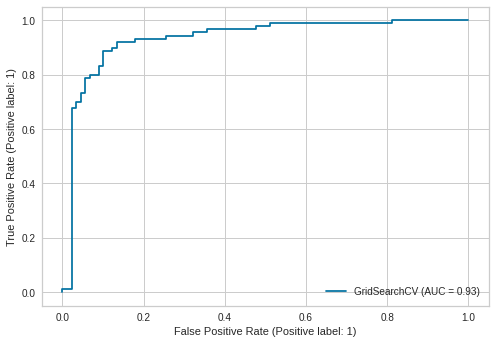

In [39]:
plot_roc_curve(grid_model, X_test, y_test) # we use ROC curve to get the AUC score and evaluate the model if it is good or not on every threshold
# Yorum Modelim %93 oranında keçimen ve besni sınıflarını ayrıştırabiliyor

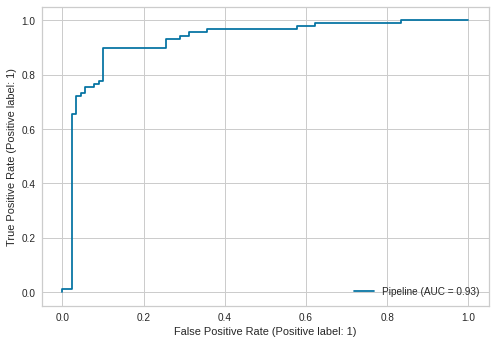

In [40]:
plot_roc_curve(log_pipe, X_test, y_test)  # Eski modelim(Parametreleriyle oynamadığımız)
# ROC larda bir değişiklik olmadı

In [41]:
# log modeldeki başarımız yüzde 88 bir de KNN e bakalım

## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()  # to get a object of KNeighborsClassifier for pipeline 
# default k =5 olarak tanımladık

In [44]:
knn_pipe = Pipeline([("scaler",scaler),("knn",knn)]) # pipeline for KNeighborsClassifier

In [45]:
knn_pipe.fit(X_train, y_train)  # Scale ve eğitim yaptı

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [46]:
knn_pred = knn_pipe.predict(X_test)

In [47]:
eval_metric(knn_pipe, X_train, y_train, X_test, y_test)
# Test accuracy 0.86, train accuracy.  0.88 k = 5 iken başarım %86. 10+16=26 tane yanlış tahmin

Test_Set
[[80 10]
 [16 74]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        90
           1       0.88      0.82      0.85        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[332  28]
 [ 55 305]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       360
           1       0.92      0.85      0.88       360

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720



### Elbow Method for Choosing Reasonable K Values

In [48]:
# Optimal k yı bulmak için kullanıyorduk

In [49]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [50]:
test_error_rates = []

for k in range(1,30):

    model = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=k))]) # p=1,weights="uniform",metric="minkowski"

    scores = cross_validate(model, X_train, y_train, scoring = ['accuracy'], cv = 10,error_score="raise")
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    
    test_error = 1 - accuracy_mean 
    test_error_rates.append(test_error)

# 1 den 30 a kadar k değerlerini deneyeceğiz
# Skorların tutarlı olması açısında cross_validate kullanıyoruz
# Tek seferlik aldığımız skordan ziyade 10 katlı Cv ile test_error hesaplamış olduk

In [51]:
# Dün yaptığımız gibi tek seferlik skorlara bakacağız bir de(Yukardaki cv 10 katlı skor, burası tek seferlik skor)
test_error_rates1 = []

for k in range(1,30):
    knn_model = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=k))])
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates1.append(test_error)

Text(0, 0.5, 'Error Rate')

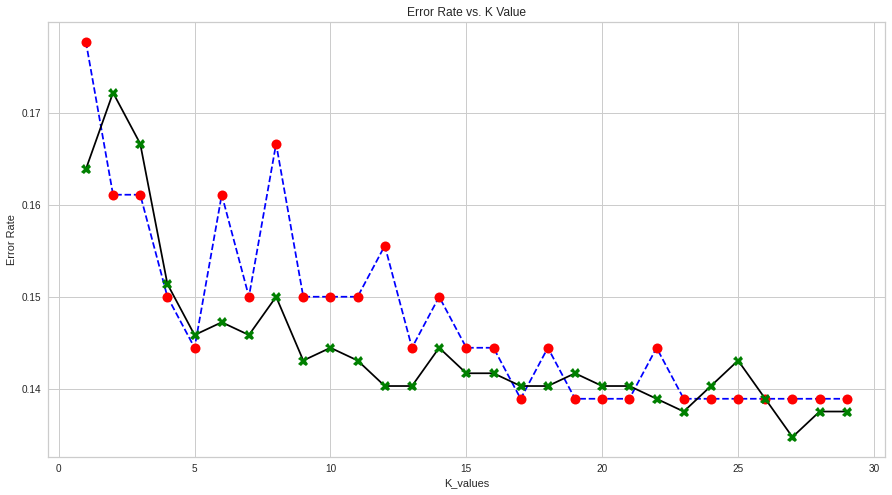

In [52]:
# Üstteki oluşturduğumuz listelerin grafiklerini çizdiriyoruz
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates1, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), test_error_rates, color='black', linestyle='-', marker='X',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

# Cv ile yapılan daha tutarlı görünüyor
# Minimum hata olan 26-27 yi seçebiliriz. Ama maliyet artabilir
# 5,12,13,23 vs seçilebilir
# Biz 5 i seçeceğiz. Hata daha yüksek ama maliyet az(Ancak biz yine denemeler yapacağız altta)

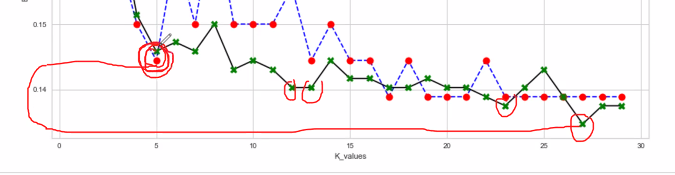

### Scores by Various K Values

In [53]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=2))])
knn.fit(X_train,y_train)
print('WITH K=2\n')
eval_metric(knn, X_train, y_train, X_test, y_test)
# k=2 için deneme yaptık
# Test accuracy 0.84, train accuracy 0.92 .. Model overfit olmuş oldu

WITH K=2

Test_Set
[[82  8]
 [21 69]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        90
           1       0.90      0.77      0.83        90

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180


Train_Set
[[360   0]
 [ 60 300]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       360
           1       1.00      0.83      0.91       360

    accuracy                           0.92       720
   macro avg       0.93      0.92      0.92       720
weighted avg       0.93      0.92      0.92       720



In [54]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=8))])

knn.fit(X_train,y_train)
print('WITH K=8\n')
eval_metric(knn, X_train, y_train, X_test, y_test)
# k=8 için deneme yaptık
# Test accuracy 0.83, train accuracy 0.88 .. 
# Ares Hoca: Skorlar birbirine yakın gibi. Overfit olma ihtimali var..

WITH K=8

Test_Set
[[81  9]
 [21 69]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        90
           1       0.88      0.77      0.82        90

    accuracy                           0.83       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.83      0.83       180


Train_Set
[[338  22]
 [ 68 292]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       360
           1       0.93      0.81      0.87       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.87       720
weighted avg       0.88      0.88      0.87       720



In [55]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=25))])

knn.fit(X_train,y_train)
print('WITH 25K=\n')
eval_metric(knn, X_train, y_train, X_test, y_test)
# k=25 için deneme yaptık
# Test accuracy 0.86, train accuracy 0.87 .. Skorlar yakın tutarlı model. Ancak iyileşme için bu kadar
# .. büyük k tercih edilir mi ? ...

WITH 25K=

Test_Set
[[81  9]
 [16 74]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.82      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[326  34]
 [ 63 297]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       360
           1       0.90      0.82      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [56]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])   
knn.fit(X_train,y_train)
print('WITH 5K=\n')
eval_metric(knn, X_train, y_train, X_test, y_test)
# k=5 için
# Test accuracy 0.86, train accuracy 0.88 . Model 10+16=26 tane hata yapıyor
# Elbow da k=5 seçmeye karar verdik.
# Peki grid search ne diyecek k için bakacağız
# Ondan önce Cross validation yapalım(k=5 iken)

WITH 5K=

Test_Set
[[80 10]
 [16 74]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        90
           1       0.88      0.82      0.85        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[332  28]
 [ 55 305]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       360
           1       0.92      0.85      0.88       360

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720



### Cross Validate

In [57]:
model =Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.007867,0.013802,0.962963,0.722222,0.825397,0.847222
2,0.006205,0.014516,0.862069,0.694444,0.769231,0.791667
3,0.007427,0.017965,0.833333,0.833333,0.833333,0.833333
4,0.006453,0.009977,0.794872,0.861111,0.826667,0.819444
5,0.004522,0.015136,0.965517,0.777778,0.861538,0.875000
6,0.004655,0.009561,0.909091,0.833333,0.869565,0.875000
7,0.004212,0.009660,0.882353,0.833333,0.857143,0.861111
8,0.004333,0.009475,0.882353,0.833333,0.857143,0.861111
9,0.004244,0.009581,0.861111,0.861111,0.861111,0.861111
10,0.005483,0.015709,1.000000,0.833333,0.909091,0.916667


In [58]:
df_scores.mean()[2:]         # test Accuracy 0.85 .. Normalde 0.86 idi. Skorlar tutarlı

test_precision    0.895366
test_recall       0.808333
test_f1           0.847022
test_accuracy     0.854167
dtype: float64

In [59]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])   # test_accuracy:    0.86 , train_accuracy :  0.88
                                              
                                                                                  # test_accuracy     0.85  (cross validation)
                                            
                                                                                  # (k=5 with elbow) with 26 wrong prediction
knn.fit(X_train,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train, y_train, X_test, y_test)  

WITH K=5

Test_Set
[[80 10]
 [16 74]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        90
           1       0.88      0.82      0.85        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[332  28]
 [ 55 305]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       360
           1       0.92      0.85      0.88       360

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720




### Gridsearch Method for Choosing Reasonable K Values

In [60]:
knn.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [61]:
# pipeline for KNeighborsClassifier
knn_grid = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier())]) 
# to get all the values of k between 1 and 30
k_values= range(1,30)                  
# to get the values of weight
weight = ['uniform', 'distance']       # hyperparameter
# to get the values of p
p = [1,2]                              # hyperparameter
# to get the values of metric
metric = ['minkowski']                 # minkowski ye göre p seçimi yapılacak  
# to get all the combinations of k, weight, p and metric
param_grid = {'knn__n_neighbors': k_values,
              'knn__weights': weight, 
              'knn__p': p, 
              'knn__metric': metric} 
# to get the best model according to the best score
knn_grid_model = GridSearchCV(estimator= knn_grid, 
                             param_grid=param_grid,
                             cv=10, 
                             scoring= 'accuracy',
                             n_jobs=-1) 

In [62]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['minkowski'],
                         'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [63]:
knn_grid_model.best_params_ # to get the best parameters according to the best score
# 'uniform' : Hepsini eşit ağırlıklandırdı
# k=14. Yukardaki grafikte 14 de hata en düşük değildi çünkü farklı parametreler ile yaptık
# Burada parametreler değişti

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 14,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [64]:
test_error_rates2 = []

for k in range(1,30):

    model = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=k, p=1))]) # p=1,weights="uniform",metric="minkowski"

    scores = cross_validate(model, X_train, y_train, scoring = ['accuracy'], cv = 10,error_score="raise")
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    
    test_error = 1 - accuracy_mean 
    test_error_rates.append(test_error)

ValueError: x and y must have same first dimension, but have shapes (29,) and (58,)

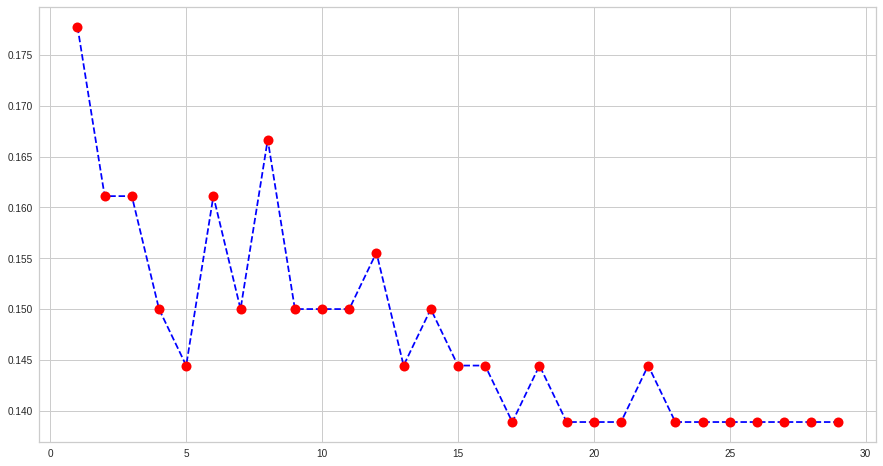

In [65]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates1, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), test_error_rates, color='black', linestyle='-', marker='X',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
# 14 te minimum olduğunu görüyoruz

In [ ]:
print('WITH K=14\n')      #  knn      test_accuracy :   0.85  (k=14 with gridsearch) with 27 wrong prediction

                          #  knn      test_accuracy :   0.86  (k=5 with elbow) with 26 wrong prediction
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)
# Skorlar birbirine yakın ama tercihen k=5 seçiyoruz(Computational cost açısından)

### Evaluating ROC Curves and AUC

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [ ]:
model = KNeighborsClassifier(n_neighbors=14, p=1, metric="minkowski", weights="uniform") # best gridsearch model 
knn_model = Pipeline([("scaler",scaler),("knn",model)])
knn_model.fit(X_train, y_train)
# Bu kodları roc curve çizdirmek için yaztık(grid search deki sonuca göre)

In [ ]:
# 0.85  (k=14 with gridsearch) with 27 wrong prediction
plot_roc_curve(knn_model, X_test, y_test) 

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

In [ ]:
model = KNeighborsClassifier(n_neighbors=5) # best elbow model

knn_model = Pipeline([("scaler",scaler),("knn",model)])

knn_model.fit(X_train, y_train)

# Bu kodları roc curve çizdirmek için yaztık(elbow daki sonuca göre)

In [ ]:
#   knn test_accuracy :  0.85         (k=14 with gridsearch)       with 27 wrong prediction

#   knn test_accuracy :   0.86        (k=5 with elbow)             with 26 wrong prediction


plot_roc_curve(knn_model, X_test, y_test)

In [ ]:
# k=14 iken Roc daha iyi buradaki kısım tercih meselesi
# k=5 ve k=14 .. ikiside doğru model
# Ares Hoca: Ben 5 komşuluğu tercih ediyorum

# Log_modeli kurarken çok uğraşmadık
# KNN de uğraştık, k değerlerini denedik parametreleri denedik, elbow ve grid search e baktık vs...
# Bundan dolayı;
# Bu data için tercih olarak KNN ve log_model arasında log_modeli tercih ederiz
# KNN tercih edersem de k=5 derim
# logistic regression daha hızlı daha az maliyetli

# class chat soru: gridsearhcv de en iyi k değeri 14 çıktı yani accuracy nin daha yüksek olması beklenmez miydi? neden k=5 de accuracy daha yüksek çıktı
# grid search de bir çok parametre ile oynadık. Skorlar iyi çıkmadı
# Orion hoca:Trainden güzel bir skor alınabilir ama hold-out test setten iyi bir skor almamız beklenir ama çıkmayabilir.
# .. ki neticede burada sonuç öyle olmuş(iyi skor olmamış anlamında)

# Conclusion 

* log_model Accuracy Score: 0.88 
* log_model AUC : 0.93           

* knn Accuracy Score :   0.86  (k=5 with elbow)  - 0.85  (k=14 with gridsearch)
* knn AUC : 0.88 (elbow) - 0.90 (gridsearch)

* As a conclusion we aplied two models to predict raisins classes and we got prety decent scores both of them
* We decided to use the Logistic Model because of its slightly better score than the knn models, plus the interpretability of logistic regression and its lower computational cost.